### Import Libraries


In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Loading Data


In [113]:
df = pd.read_csv("/content/drive/MyDrive/AI _Project/dataset_Facebook.csv",delimiter=';')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 19 columns):
 #   Column                                                               Non-Null Count  Dtype  
---  ------                                                               --------------  -----  
 0   Page total likes                                                     500 non-null    int64  
 1   Type                                                                 500 non-null    object 
 2   Category                                                             500 non-null    int64  
 3   Post Month                                                           500 non-null    int64  
 4   Post Weekday                                                         500 non-null    int64  
 5   Post Hour                                                            500 non-null    int64  
 6   Paid                                                                 499 non-null    float64
 7   Lifetime

In [114]:
df.head(10)


,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,139441,Photo,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,Status,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,Photo,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,Photo,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,Photo,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393
5,139441,Status,2,12,1,9,0.0,10472,20849,1191,1073,1389,16034,7852,1016,1,152.0,33.0,186
6,139441,Photo,3,12,1,3,1.0,11692,19479,481,265,364,15432,9328,379,3,249.0,27.0,279
7,139441,Photo,3,12,7,9,1.0,13720,24137,537,232,305,19728,11056,422,0,325.0,14.0,339
8,139441,Status,2,12,7,3,0.0,11844,22538,1530,1407,1692,15220,7912,1250,0,161.0,31.0,192
9,139441,Photo,3,12,6,10,0.0,4694,8668,280,183,250,4309,2324,199,3,113.0,26.0,142


### Pre-Processing


In [115]:
df['Paid'].value_counts()
df['like'].fillna(0,inplace=True)
df['share'].fillna(0,inplace=True)
df['Paid'].fillna(0,inplace=True)

In [116]:
# df.drop(df.columns[1],axis=1,inplace = True)


<ipython-input-117-a8bd33e90e8d>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),cmap='viridis',annot=True,cbar=False)


<Axes: >

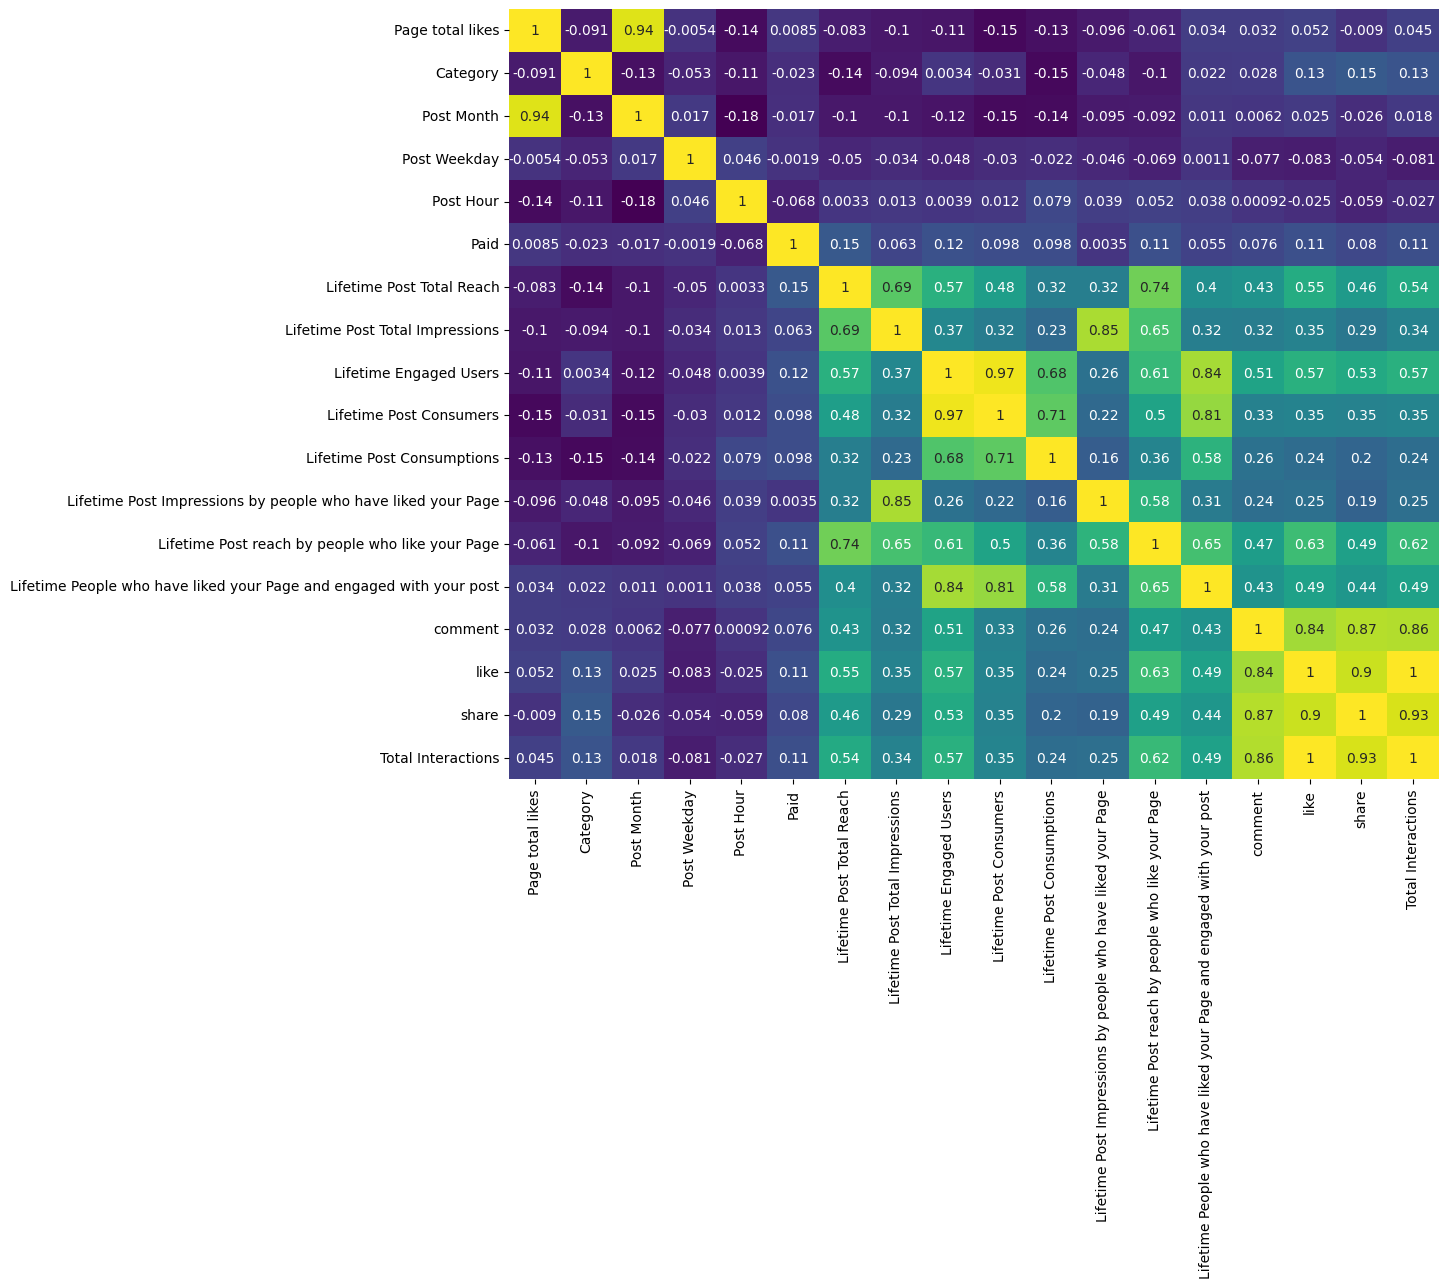

In [117]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),cmap='viridis',annot=True,cbar=False)

### Model

In [118]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import SelectKBest

In [119]:
#outlierCut = np.percentile(df['Lifetime Post Total Reach'],90)
outlierCut = np.percentile(df['Lifetime Post Total Reach'],90)
outlierCut

37116.8

In [120]:
df = df[df['Lifetime Post Total Reach']<outlierCut]

In [121]:
def Weekday(x):
    if x == 1:
        return 'Su'
    elif x== 2:
        return 'Mo'
    elif x == 3:
        return 'Tu'
    elif x == 4:
        return 'We'
    elif x == 5:
        return 'Th'
    elif x ==6:
        return 'Fr'
    elif x == 7:
        return "Sa"

df['Weekday'] = df['Post Weekday'].apply(lambda x: Weekday(x))

### Spanning out categorical columns

In [122]:
# dayDf = pd.get_dummies(df['Weekday'])
df = pd.concat([df,dayDf],axis=1)
hours = list(range(0,18))
#hours
for i in hours:
    hours[i] = str(hours[i])
    hours[i]='hr_'+ hours[i]
    #print str(hours[i])
hourDf = pd.get_dummies(df['Post Hour'],prefix='hr_')
df = pd.concat([df,hourDf],axis=1)
monthDf = pd.get_dummies(df['Post Month'],prefix='Mo')
df = pd.concat([df,monthDf],axis=1)
df['Video'] = pd.get_dummies(df['Type'])['Video']
df['Status'] = pd.get_dummies(df['Type'])['Status']
df['Photo'] = pd.get_dummies(df['Type'])['Photo']
df['Cat_1'] = pd.get_dummies(df['Category'])[1]
df['Cat_2'] = pd.get_dummies(df['Category'])[2]
#To avoid multicollinearity with the post types I am not including Links.

In [123]:
df.head(10)

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,...,Mo_8,Mo_9,Mo_10,Mo_11,Mo_12,Video,Status,Photo,Cat_1,Cat_2
0,139441,Photo,2,12,4,3,0.0,2752,5091,178,...,0,0,0,0,1,0,0,1,0,1
1,139441,Status,2,12,3,10,0.0,10460,19057,1457,...,0,0,0,0,1,0,1,0,0,1
2,139441,Photo,3,12,3,3,0.0,2413,4373,177,...,0,0,0,0,1,0,0,1,0,0
4,139441,Photo,2,12,2,3,0.0,7244,13594,671,...,0,0,0,0,1,0,0,1,0,1
5,139441,Status,2,12,1,9,0.0,10472,20849,1191,...,0,0,0,0,1,0,1,0,0,1
6,139441,Photo,3,12,1,3,1.0,11692,19479,481,...,0,0,0,0,1,0,0,1,0,0
7,139441,Photo,3,12,7,9,1.0,13720,24137,537,...,0,0,0,0,1,0,0,1,0,0
8,139441,Status,2,12,7,3,0.0,11844,22538,1530,...,0,0,0,0,1,0,1,0,0,1
9,139441,Photo,3,12,6,10,0.0,4694,8668,280,...,0,0,0,0,1,0,0,1,0,0
10,139441,Status,2,12,5,10,0.0,21744,42334,4258,...,0,0,0,0,1,0,1,0,0,1


In [124]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))

# Reshape the input data before applying the transformation
df['Scaled_Lifetime Post Total Reach'] = scaler.fit_transform(df['Lifetime Post Total Reach'].values.reshape(-1, 1))
df['scaled_Page total likes'] = scaler.fit_transform(df['Page total likes'].values.reshape(-1, 1))


In [125]:
df.head(2)

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,...,Mo_10,Mo_11,Mo_12,Video,Status,Photo,Cat_1,Cat_2,Scaled_Lifetime Post Total Reach,scaled_Page total likes
0,139441,Photo,2,12,4,3,0.0,2752,5091,178,...,0,0,1,0,0,1,0,1,0.068223,1.0
1,139441,Status,2,12,3,10,0.0,10460,19057,1457,...,0,0,1,0,1,0,0,1,0.277395,1.0


### Train Test Split

In [126]:
#
x = df[['scaled_Page total likes','Paid','Video','Status','Photo','Total Interactions',#"like",'comment','share',
    'Cat_1','Cat_2','Mo','Tu','Sa',"We",'Th','Fr',
       'hr__17','hr__1','hr__2','hr__3','hr__4','hr__5', 'hr__6','hr__7','hr__8',
        'hr__9','hr__10','hr__11','hr__12','hr__13','hr__14','hr__15','hr__16','Mo_1',
       'Mo_2','Mo_12','Mo_4','Mo_5','Mo_6','Mo_7','Mo_8','Mo_9','Mo_11','Mo_10']]
y = df['Lifetime Engaged Users']
#y = df['Scaled_Lifetime Post Total Reach']

### Feature Selection

In [127]:
# Select 20 best features using k-best
k_best = SelectKBest(k=20)
k_best.fit(x,y)


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


SelectKBest(k=20)

In [128]:
# Getting the indices for the top columns
k_best.get_support(indices=True)


array([ 0,  3,  4,  5,  6,  7,  9, 10, 14, 15, 16, 17, 20, 24, 27, 32, 33,
       35, 38, 41])

In [129]:
# filtering the reduced columns
ogCols = x.columns
new_cols = [ogCols[i] for i in k_best.get_support(indices=True)]
new_cols

['scaled_Page total likes',
 'Status',
 'Photo',
 'Total Interactions',
 'Cat_1',
 'Cat_2',
 'Tu',
 'Sa',
 'hr__17',
 'hr__1',
 'hr__2',
 'hr__3',
 'hr__6',
 'hr__10',
 'hr__13',
 'Mo_2',
 'Mo_12',
 'Mo_5',
 'Mo_8',
 'Mo_10']

In [130]:
x = df[new_cols]
#x = df[topVars]

x_train,x_test,y_train, y_test = train_test_split(x,
                                                  y, test_size=0.2,
                                                  random_state=50)

In [131]:
y_test.count()

90

In [ ]:
x_test.columns


In [133]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor



In [134]:
len(new_cols)



20

### Extract features from lasso

In [135]:
x = df[new_cols]

x_train,x_test,y_train, y_test = train_test_split(x,
                                                  y, test_size=0.3,
                                                  random_state=50)


In [136]:
#rf = AdaBoostRegressor(n_estimators=500)

rf = RandomForestRegressor(n_estimators=500,min_samples_split=15)
rf.fit(x_train,y_train)

RandomForestRegressor(min_samples_split=15, n_estimators=500)

### Model Validation

In [142]:
regPerf = RegScorePlot(reg,x_test=x_test,x_train=x_train,y_test=y_test,y_train=y_train)


ValueError: ignored

In [111]:
from sklearn.metrics import r2_score
from scipy.stats import spearmanr, pearsonr

# Assuming rf, x_train, x_test, y_train, and y_test are defined

# Predictions on the training set
y_train_pred = rf.predict(x_train)

# Predictions on the test set
y_test_pred = rf.predict(x_test)

# R-squared for training set
train_r2 = r2_score(y_train, y_train_pred)
# Spearman correlation for training set
train_spearman_corr, _ = spearmanr(y_train, y_train_pred)
# Pearson correlation for training set
train_pearson_corr, _ = pearsonr(y_train, y_train_pred)

# R-squared for test set
test_r2 = r2_score(y_test, y_test_pred)
# Spearman correlation for test set
test_spearman_corr, _ = spearmanr(y_test, y_test_pred)
# Pearson correlation for test set
test_pearson_corr, _ = pearsonr(y_test, y_test_pred)

# Print the results
print("Train data R-2 score:", train_r2)
print("Train data Spearman correlation:", train_spearman_corr)
print("Train data Pearson correlation:", train_pearson_corr)
print("\n")
print("Test data R-2 score:", test_r2)
print("Test data Spearman correlation:", test_spearman_corr)
print("Test data Pearson correlation:", test_pearson_corr)




NotFittedError: ignored